# Polars

Motivación: 
- https://h2oai.github.io/db-benchmark/
- https://arrow.apache.org/ https://maximilianmichels.com/2020/apache-arrow-the-hidden-champion/


- **Guía rápida** - https://pola-rs.github.io/polars-book/user-guide/quickstart/quick-exploration-guide.html
- **Guía de usuario** https://pola-rs.github.io/polars-book/user-guide/index.html
- **Referencia de API** https://pola-rs.github.io/polars/py-polars/html/reference/
- **Coming from pandas** - https://pola-rs.github.io/polars-book/user-guide/coming_from_pandas.html

In [39]:
# !pip install -U polars

In [1]:
import polars as pl
import numpy as np
from datetime import datetime, timedelta

In [2]:
pl.show_versions()

--------Version info---------
Polars:               0.19.19
Index type:           UInt32
Platform:             Linux-6.1.0-13-amd64-x86_64-with-glibc2.36
Python:               3.9.13 (main, Aug 25 2022, 23:26:10) 
[GCC 11.2.0]

----Optional dependencies----
adbc_driver_manager:  <not installed>
cloudpickle:          2.2.1
connectorx:           <not installed>
deltalake:            <not installed>
fsspec:               2022.7.1
gevent:               23.9.1
matplotlib:           3.5.2
numpy:                1.22.4
openpyxl:             3.0.9
pandas:               1.5.3
pyarrow:              13.0.0
pydantic:             1.8.2
pyiceberg:            <not installed>
pyxlsb:               <not installed>
sqlalchemy:           1.4.39
xlsx2csv:             <not installed>
xlsxwriter:           3.1.9


In [3]:
# with a tuple
series = pl.Series("a", [1, 2, 3, 4, 5], dtype=pl.UInt64)

series

a
u64
1
2
3
4
5


In [4]:
dataframe = pl.DataFrame({"integer": [1, 2, 3], 
                          "date": [
                              (datetime(2022, 1, 1)), 
                              (datetime(2022, 1, 2)), 
                              (datetime(2022, 1, 3))
                          ], 
                          "float":[4.0, 5.0, 6.0]})
dataframe

integer,date,float
i64,datetime[μs],f64
1,2022-01-01 00:00:00,4.0
2,2022-01-02 00:00:00,5.0
3,2022-01-03 00:00:00,6.0


In [6]:
df = pl.DataFrame(
    {"a":  [{"t": 1.0, "u": "hola", "i": [5,6,7]}]}
)
df

a
struct[3]
"{1.0,""hola"",[5, 6, 7]}"


In [7]:
df.schema

OrderedDict([('a',
              Struct([Field('t', Float64), Field('u', Utf8), Field('i', List(Int64))]))])

In [8]:
df.unnest('a')

t,u,i
f64,str,list[i64]
1.0,"""hola""","[5, 6, 7]"


In [13]:
dataframe.write_parquet('output.parquet')

In [15]:
loaded_df = pl.read_parquet('output.parquet')
type(loaded_df)

polars.dataframe.frame.DataFrame

In [16]:
lazy_df = pl.scan_parquet('output.parquet')
type(lazy_df)

polars.lazyframe.frame.LazyFrame

In [17]:
loaded_df

integer,date,float
i64,datetime[μs],f64
1,2022-01-01 00:00:00,4.0
2,2022-01-02 00:00:00,5.0
3,2022-01-03 00:00:00,6.0


In [18]:
lazy_df

<LazyFrame [3 cols, {"integer": Int64 … "float": Float64}] at 0x7F2C954CCC40>

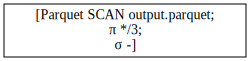

In [19]:
lazy_df.show_graph()

In [20]:
lazy_df.collect()

integer,date,float
i64,datetime[μs],f64
1,2022-01-01 00:00:00,4.0
2,2022-01-02 00:00:00,5.0
3,2022-01-03 00:00:00,6.0


**EAGER vs LAZY**

In [11]:
type(dataframe)

polars.dataframe.frame.DataFrame

In [12]:
type(lazy_df)

polars.lazyframe.frame.LazyFrame

In [30]:
type(pl.col('float') < 6.0)

polars.expr.expr.Expr

In [23]:
lazy_df.filter(pl.col('float') < 6.0).select('date').collect()

date
datetime[μs]
2022-01-01 00:00:00
2022-01-02 00:00:00


In [26]:
loaded_df.filter(pl.col('float') < 6.0).select('date')

date
datetime[μs]
2022-01-01 00:00:00
2022-01-02 00:00:00


In [28]:
lazy_df.filter(pl.col('float') < 6.0).select('date')

<LazyFrame [1 col, {"date": Datetime(time_unit='us', time_zone=None)}] at 0x7F2C95635520>

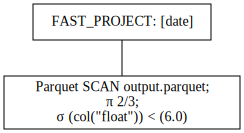

In [27]:
lazy_df.filter(pl.col('float') < 6.0).select('date').show_graph()

In [34]:
query_df = lazy_df.with_columns(
    pl.col('date').dt.month().alias('month'),
    (pl.col('float') < 5.5).alias('mask'),
    pl.col('integer').clip(lower_bound=2).alias('clipped_integer')
).collect()
query_df

integer,date,float,month,mask,clipped_integer
i64,datetime[μs],f64,u32,bool,i64
1,2022-01-01 00:00:00,4.0,1,true,2
2,2022-01-02 00:00:00,5.0,1,true,2
3,2022-01-03 00:00:00,6.0,1,false,3


In [8]:
query_df.collect()

integer,date,float,month
i64,datetime[μs],f64,u32
1,2022-01-01 00:00:00,4.0,1
2,2022-01-02 00:00:00,5.0,1
3,2022-01-03 00:00:00,6.0,1


In [35]:
built_df = lazy_df.with_columns([
    pl.col('date').dt.month().alias('month'),
    (pl.col('integer') * 123).alias('multiplied'),
    (pl.Series([[1, 5, 6, 7], [2], []])).alias('inline')
]
    ).collect()
built_df

integer,date,float,month,multiplied,inline
i64,datetime[μs],f64,u32,i64,list[i64]
1,2022-01-01 00:00:00,4.0,1,123,"[1, 5, … 7]"
2,2022-01-02 00:00:00,5.0,1,246,[2]
3,2022-01-03 00:00:00,6.0,1,369,[]


In [37]:
built_df.with_columns(pl.col('inline').cast(pl.List(pl.Utf8)))

integer,date,float,month,multiplied,inline
i64,datetime[μs],f64,u32,i64,list[str]
1,2022-01-01 00:00:00,4.0,1,123,"[""1"", ""5"", … ""7""]"
2,2022-01-02 00:00:00,5.0,1,246,"[""2""]"
3,2022-01-03 00:00:00,6.0,1,369,[]


In [39]:
pl.col('inline').list.sum()

In [40]:
built_df.with_columns(
    pl.col('inline').list.sum()
)

integer,date,float,month,multiplied,inline
i64,datetime[μs],f64,u32,i64,i64
1,2022-01-01 00:00:00,4.0,1,123,19
2,2022-01-02 00:00:00,5.0,1,246,2
3,2022-01-03 00:00:00,6.0,1,369,0


In [43]:
built_df.select(
    'integer', 'date'
)

integer,date
i64,datetime[μs]
1,2022-01-01 00:00:00
2,2022-01-02 00:00:00
3,2022-01-03 00:00:00


In [41]:
built_df.select(
    pl.col('float') * 50
)

float
f64
200.0
250.0
300.0


In [13]:
built_df.select(
    pl.col('float').sum()
)

float
f64
15.0


In [46]:
built_df = built_df.with_columns(
    pl.col('inline').list.mean().alias('inline_mean')
)
built_df

integer,date,float,month,multiplied,inline,inline_mean
i64,datetime[μs],f64,u32,i64,list[i64],f64
1,2022-01-01 00:00:00,4.0,1,123,"[1, 5, … 7]",4.75
2,2022-01-02 00:00:00,5.0,1,246,[2],2.0
3,2022-01-03 00:00:00,6.0,1,369,[],NaN


In [49]:
built_df.schema

OrderedDict([('integer', Int64),
             ('date', Datetime(time_unit='us', time_zone=None)),
             ('float', Float64),
             ('month', UInt32),
             ('multiplied', Int64),
             ('inline', List(Int64)),
             ('inline_mean', Float64)])

In [48]:
built_df.to_pandas().dtypes

integer                 int64
date           datetime64[ns]
float                 float64
month                  uint32
multiplied              int64
inline                 object
inline_mean           float64
dtype: object

In [50]:
built_df.select(
    [pl.col(col).is_null().sum() for col in built_df.columns]
)

integer,date,float,month,multiplied,inline,inline_mean
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


In [59]:
import pandas as pd

example = pd.DataFrame({"a": [1, 2, np.nan, None]})
example

,a
0,1.0
1,2.0
2,NaN
3,NaN


In [60]:
example.dtypes

a    float64
dtype: object

In [61]:
example = pl.DataFrame({"a": [1, 2, np.nan, None]})
example

a
f64
1.0
2.0
NaN
null


In [56]:
example.schema

OrderedDict([('a', Int64)])

In [62]:
df = pl.DataFrame({"a": np.arange(0, 8), 
                   "b": np.random.rand(8), 
                   "c": [datetime(2022, 12, 1) + timedelta(days=idx) for idx in range(8)],
                   "d": [1, 2.0, np.NaN, np.NaN, 0, -5, -42, None]
                  })
df = pl.concat([df, df])
df

a,b,c,d
i64,f64,datetime[μs],f64
0,0.879367,2022-12-01 00:00:00,1.0
1,0.417416,2022-12-02 00:00:00,2.0
2,0.815772,2022-12-03 00:00:00,NaN
3,0.235698,2022-12-04 00:00:00,NaN
4,0.819098,2022-12-05 00:00:00,0.0
5,0.574275,2022-12-06 00:00:00,-5.0
6,0.033968,2022-12-07 00:00:00,-42.0
7,0.364118,2022-12-08 00:00:00,null
0,0.879367,2022-12-01 00:00:00,1.0


In [64]:
df.with_columns(
    pl.col('d').fill_nan(None).fill_null(99.9)
)

a,b,c,d
i64,f64,datetime[μs],f64
0,0.879367,2022-12-01 00:00:00,1.0
1,0.417416,2022-12-02 00:00:00,2.0
2,0.815772,2022-12-03 00:00:00,99.9
3,0.235698,2022-12-04 00:00:00,99.9
4,0.819098,2022-12-05 00:00:00,0.0
5,0.574275,2022-12-06 00:00:00,-5.0
6,0.033968,2022-12-07 00:00:00,-42.0
7,0.364118,2022-12-08 00:00:00,99.9
0,0.879367,2022-12-01 00:00:00,1.0


In [65]:
df.sample(n=3, seed=1)

a,b,c,d
i64,f64,datetime[μs],f64
0,0.879367,2022-12-01 00:00:00,1.0
2,0.815772,2022-12-03 00:00:00,NaN
5,0.574275,2022-12-06 00:00:00,-5.0


In [72]:
(df
 .group_by(
     pl.col('c').dt.weekday().alias('c_weekday')
 )
 .agg(
     pl.col('d').mean().alias('d_mean'),
     pl.col('d').count().alias('d_count'),
     pl.col('d').quantile(0.5).alias('d_median'),
     pl.col('d').quantile(0.5).alias('d_median')
 )
 .sort('c_weekday')
)

c_weekday,d_mean,d_count,d_median
u32,f64,u32,f64
1,0.0,2,0.0
2,-5.0,2,-5.0
3,-42.0,2,-42.0
4,1.0,4,1.0
5,2.0,2,2.0
6,NaN,2,NaN
7,NaN,2,NaN
